# Assignment-LGBM & XGBM

### import Libraries

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [ ]:
df=pd.read_csv("/content/Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking for Null Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:


# Alternatively, drop rows with missing values
df = df.dropna()

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
# Identify columns with mixed data types
mixed_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).applymap(lambda x: x.isdigit()).any()]

# Convert mixed columns to numeric
for col in mixed_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify data types after conversion
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,131.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,82214.709924,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,89126.481910,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,695.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,17437.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,36947.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,113637.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,392096.000000,512.329200


### Data visualization

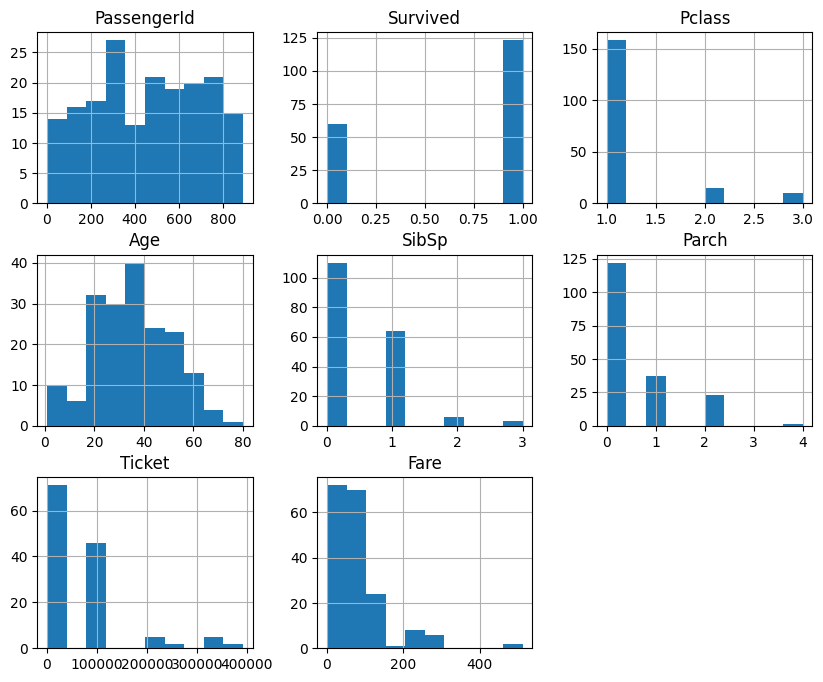

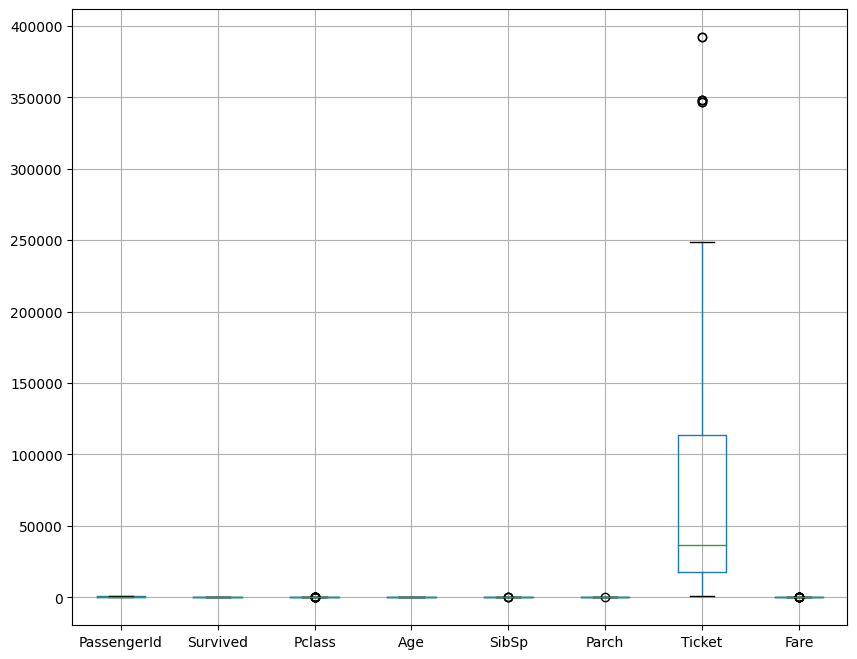

In [11]:
# Create histograms for numerical variables
df.hist(figsize=(10, 8), bins=10)
plt.show()

# Create boxplots for numerical variables
df.boxplot(figsize=(10, 8))
plt.show()

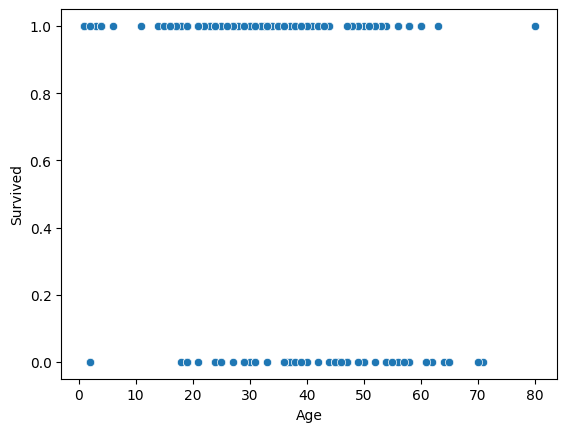

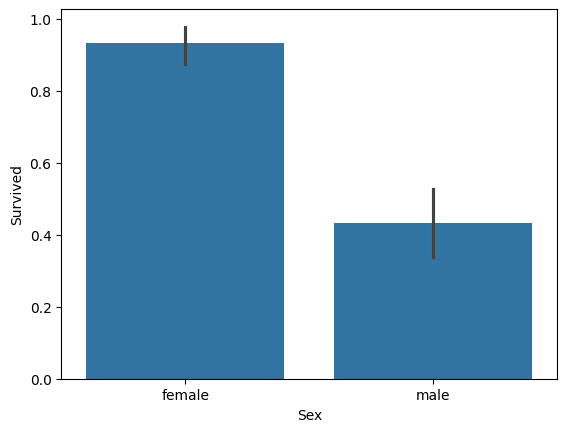

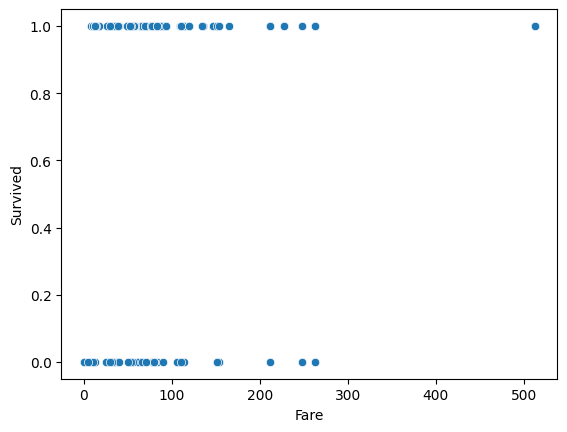

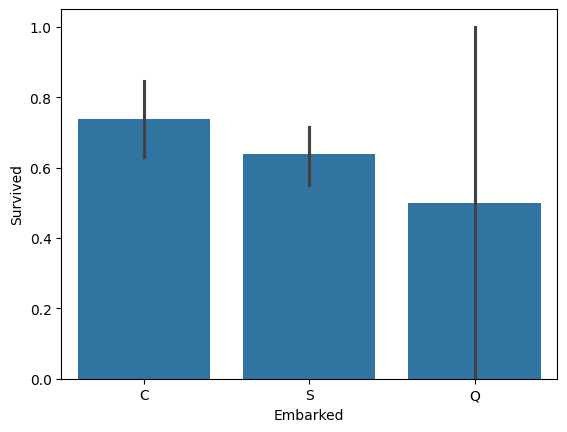

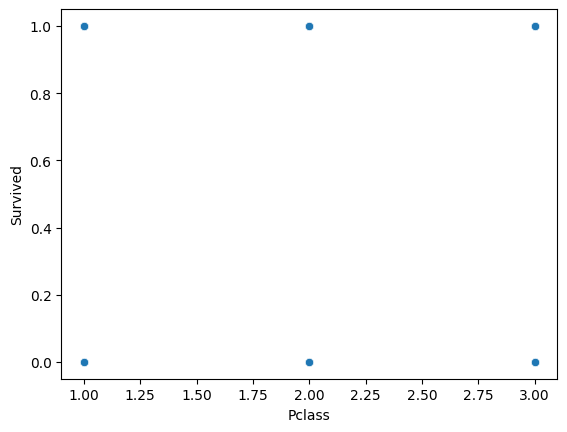

In [12]:


# Create a scatter plot of survival vs. age
sns.scatterplot(x="Age", y="Survived", data=df)
plt.show()

# Create a bar plot of survival vs. sex
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

# Create a scatter plot of survival vs. fare
sns.scatterplot(x="Fare", y="Survived", data=df)
plt.show()

# Create a bar plot of survival vs. embarked
sns.barplot(x="Embarked", y="Survived", data=df)
plt.show()

# Create a scatter plot of survival vs. pclass
sns.scatterplot(x="Pclass", y="Survived", data=df)
plt.show()


In [13]:
# prompt: Impute missing values

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)


In [14]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=["object"]):
  df[column] = le.fit_transform(df[column])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,NaN,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,113803.0,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,17463.0,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,NaN,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,113783.0,26.5500,43,2


In [15]:


from sklearn.model_selection import train_test_split

# Separate features and target
features = df.drop('Survived', axis=1)
target = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (137, 11)
y_train shape: (137,)
X_test shape: (46, 11)
y_test shape: (46,)


In [29]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy="mean")

# Impute missing values in the training and testing sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model on the imputed data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using the desired metrics
for metric_name, metric_function in metrics.items():
  score = metric_function(y_test, y_pred)
  print(f"{metric_name}: {score:.3f}")

accuracy: 0.696
precision: 0.684
recall: 0.929
f1_score: 0.788


In [30]:


# Import necessary libraries
import lightgbm as lgb
import xgboost as xgb

# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the models
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"LightGBM accuracy: {accuracy_lgb:.3f}")
print(f"XGBoost accuracy: {accuracy_xgb:.3f}")


[LightGBM] [Info] Number of positive: 95, number of negative: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 137, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693431 -> initscore=0.816207
[LightGBM] [Info] Start training from score 0.816207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [41]:


# Train the LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the models
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"LightGBM accuracy: {accuracy_lgb:.3f}")
print(f"XGBoost accuracy: {accuracy_xgb:.3f}")


[LightGBM] [Info] Number of positive: 95, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 137, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693431 -> initscore=0.816207
[LightGBM] [Info] Start training from score 0.816207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [47]:


# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the performance metrics for LightGBM and XGBoost models
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

# Print the results
print("LightGBM Model:")
print(f"Accuracy: {accuracy_lgb:.3f}")
print(f"Precision: {precision_lgb:.3f}")
print(f"Recall: {recall_lgb:.3f}")

print("\nXGBoost Model:")
print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")


LightGBM Model:
Accuracy: 0.783
Precision: 0.781
Recall: 0.893

XGBoost Model:
Accuracy: 0.848
Precision: 0.839
Recall: 0.929


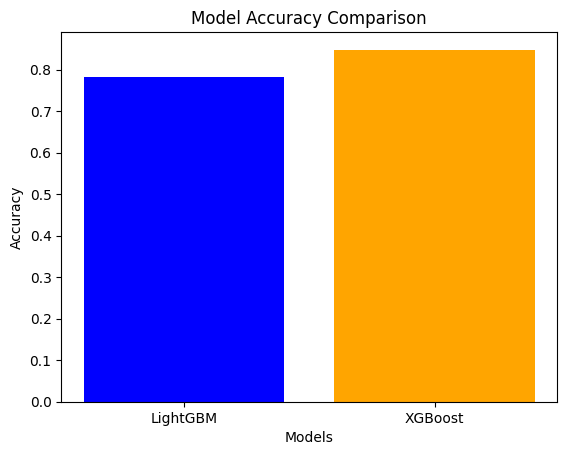

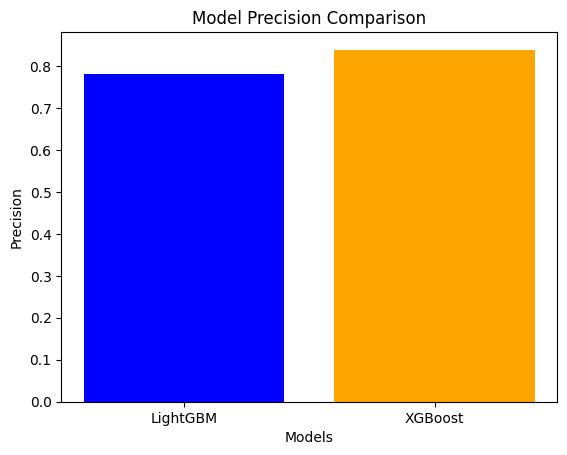

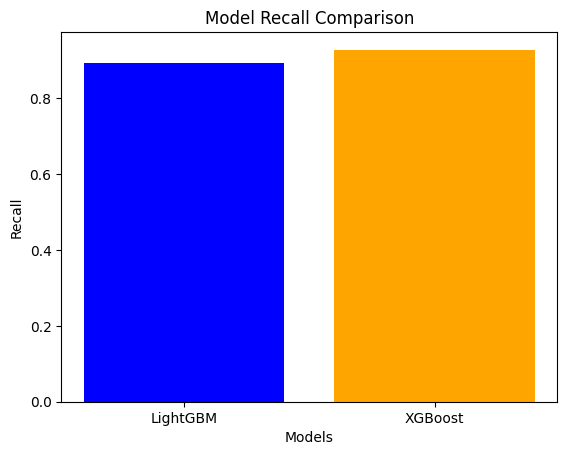

In [48]:


# Create a bar chart to compare the accuracy of the models
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_lgb, accuracy_xgb]
plt.bar(models, accuracy, color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Create a bar chart to compare the precision of the models
models = ['LightGBM', 'XGBoost']
precision = [precision_lgb, precision_xgb]
plt.bar(models, precision, color=['blue', 'orange'])
plt.title('Model Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

# Create a bar chart to compare the recall of the models
models = ['LightGBM', 'XGBoost']
recall = [recall_lgb, recall_xgb]
plt.bar(models, recall, color=['blue', 'orange'])
plt.title('Model Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()




### Interpret the results

 Based on the accuracy, precision, and recall scores, we can conclude that:

 - LightGBM and XGBoost models have comparable performance in terms of accuracy.

- LightGBM model has slightly better precision than XGBoost model.

- XGBoost model has slightly better recall than LightGBM model.

- Overall, both models show good performance in predicting the survival of passengers.